In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic' # 한글 폰트 설정
plt.rc('font', size=15)
plt.rcParams['figure.figsize'] = (10, 6) # 그래프 크기 설정

In [2]:
df=pd.read_csv('./kb_now_selling_data.csv')

In [3]:
df

,이름,제조회사,모델명,가격,배기량,연식,색상,주행거리,변속기,연료,차종,압류/저당,구동방식,사고유무,전손이력,생산지
0,쌍용 티볼리 LX 2WD 세부등급 없음,쌍용,티볼리,1360,1597,2017,진주색,40007,자동,휘발유,SUV,0,전륜,1,0,국산차
1,기아 올 뉴 모닝 럭셔리,기아,모닝,670,998,2012,진주색,48280,자동,휘발유,경차,0,전륜,0,0,국산차
2,쉐보레(GM대우) 알페온 EL300 슈프림,쉐보레,알페온,900,2997,2012,은색,69377,자동,휘발유,대형차,0,전륜,0,0,국산차
3,쌍용 렉스턴 스포츠 디젤 2.2 4WD 노블레스,쌍용,렉스턴,2420,2157,2019,쥐색,41820,자동,경유,SUV,0,4륜,0,0,국산차
4,쉐보레(GM대우) 더 뉴 말리부 1.3 터보 프리미어 세부등급없음,쉐보레,말리부,2240,1341,2021,검정색,29856,자동,휘발유,중형차,0,전륜,0,0,국산차
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21298,아우디 S4,아우디,S4,1330,0,2011,0색,87219,자동,휘발유,0,0,후륜,0,0,외제차
21299,기아 스포티지R,기아,스포티지,800,1995,2011,검정색,129430,자동,경유,SUV,0,전륜,1,0,국산차
21300,폭스바겐 티구안(1세대),폭스바겐,티구안,1030,2000,2014,흰색,167662,자동,경유,SUV,0,전륜,0,0,외제차
21301,제네시스 EQ900,제네시스,제네시스,3390,5038,2016,검정색,172795,자동,휘발유,대형차,0,후륜,1,0,국산차


In [4]:
df.describe()

,가격,배기량,연식,주행거리,압류/저당,사고유무,전손이력
count,21303.000000,21303.000000,21303.000000,21303.000000,21303.0,21303.000000,21303.000000
mean,1945.107872,2113.190630,2016.694128,67774.878937,0.0,0.108576,0.000563
std,1646.553508,775.216336,19.787137,53711.719706,0.0,0.311114,0.023728
min,50.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,940.000000,1598.000000,2015.000000,25484.500000,0.0,0.000000,0.000000
50%,1580.000000,1998.000000,2018.000000,60059.000000,0.0,0.000000,0.000000
75%,2450.000000,2400.000000,2019.000000,98994.000000,0.0,0.000000,0.000000
max,30390.000000,20000.000000,2023.000000,508002.000000,0.0,1.000000,1.000000


# 가격

In [5]:
#가격 기초 통계량
df[['가격']].describe()

,가격
count,21303.000000
mean,1945.107872
std,1646.553508
min,50.000000
25%,940.000000
50%,1580.000000
75%,2450.000000
max,30390.000000


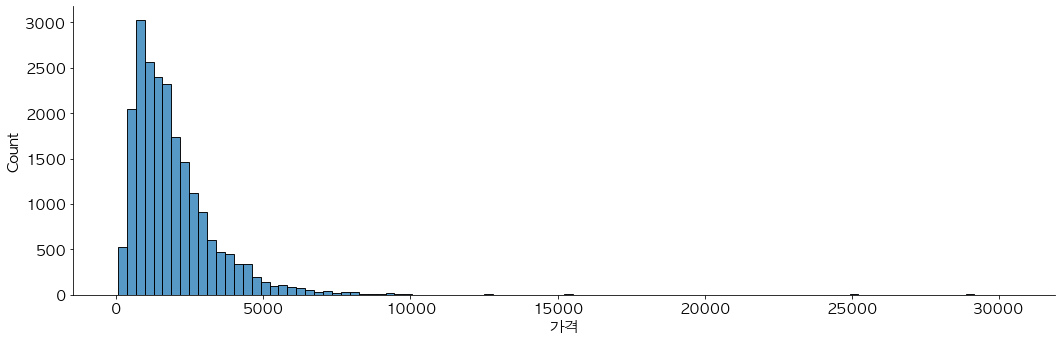

In [6]:
# 가격 분포
sns.displot(df['가격'],bins=100,height = 5, aspect = 3)

# 모델명

In [7]:
model=df.groupby('모델명')

In [8]:
top20_model=list(model.count().sort_values('이름',ascending=False)[:20].index)

In [9]:
model.count().sort_values('이름',ascending=False)[:20][['이름']]

,이름
모델명,
그랜저,1694
제네시스,1376
아반떼,874
카니발,765
쏘렌토,735
K5,670
쏘나타,663
스파크,662
싼타페,633


In [10]:
model.mean()[['가격','연식','주행거리']].loc[top20_model]

,가격,연식,주행거리
모델명,,,
그랜저,1879.237898,2017.540732,60198.046045
제네시스,2935.475291,2017.641715,66824.896802
아반떼,1109.924485,2015.832952,72162.768879
카니발,2121.048366,2017.890196,61683.783007
쏘렌토,2053.374150,2017.145578,75918.374150
K5,1519.577612,2017.094030,71800.023881
쏘나타,1406.604827,2013.348416,77238.279035
스파크,783.910876,2016.590634,49568.862538
싼타페,1847.860979,2016.938389,74188.322275


# 제조회사

In [11]:
#groupby 제조회사
manufacture = df.groupby('제조회사')

<AxesSubplot:ylabel='이름'>

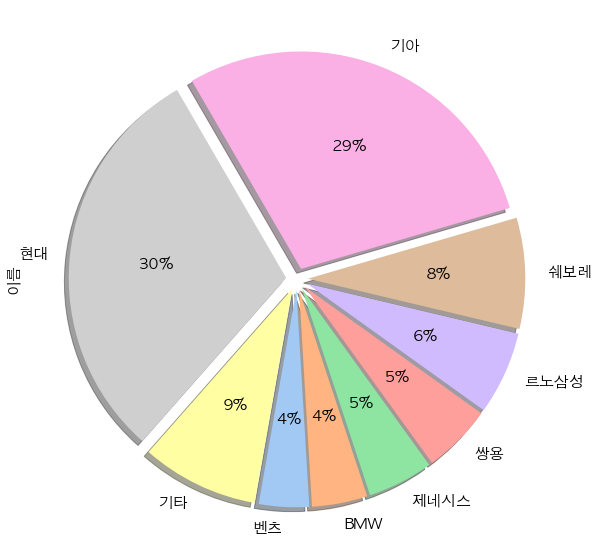

In [12]:
# 브랜드 별 매물 개수
sort_manu=manufacture.count()['이름'].sort_values()
tmp=sort_manu[-8:]
tmp['기타']=sort_manu[1:-8].sum()
sort_manu=tmp
colors=sns.color_palette('pastel')[0:10]
plt.figure(figsize=(10,10))
sort_manu.plot(kind='pie',colors=colors,autopct='%.0f%%',shadow=True,explode=[0.05 for x in range(len(sort_manu))],startangle=260)

In [13]:
# 상위 8개 매물 수 평균 가격
manu_price=manufacture.mean()['가격']
pd.DataFrame(manu_price.sort_values()[['현대','기아','쉐보레','르노삼성','쌍용','제네시스','BMW','벤츠']])

,가격
제조회사,
현대,1655.044555
기아,1677.787795
쉐보레,1108.071266
르노삼성,1172.694992
쌍용,1676.964416
제네시스,3373.640730
BMW,3210.808656
벤츠,4523.905542


# 차종

In [14]:
kind=df.groupby('차종')

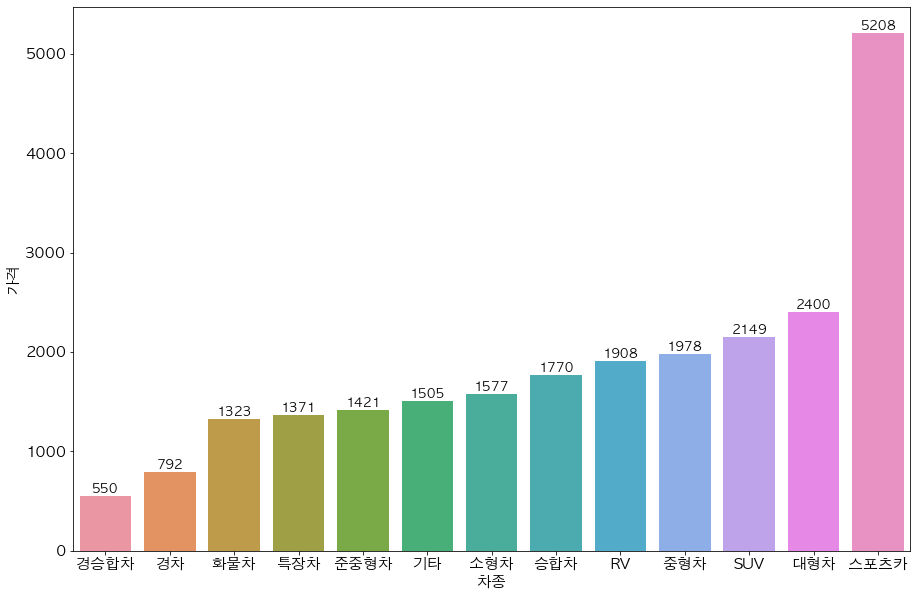

In [15]:
kind_price=kind.mean()
plt.figure(figsize=(15,10))
kind_price.drop('0',inplace=True)
kind_price=kind_price.sort_values(by='가격')
ax=sns.barplot(x=kind_price.index,y='가격',data=kind_price)
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30),
    ha='center', va='center', fontsize=13, color='black', xytext=(0, 10),
    textcoords='offset points')

# 색상

In [16]:
color=df.groupby('색상')

<AxesSubplot:ylabel='이름'>

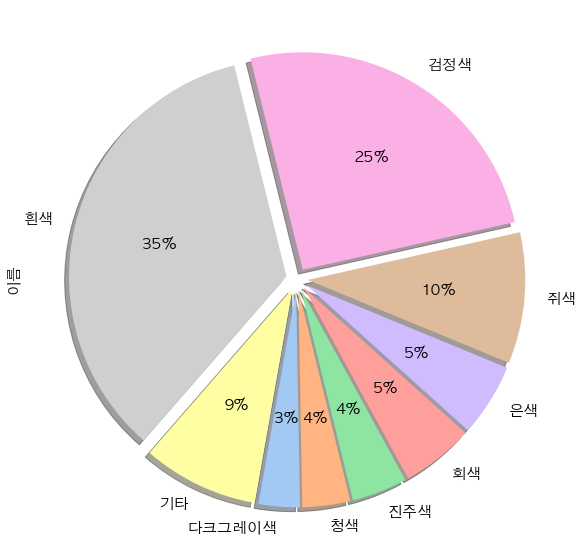

In [17]:
# 색상 별 매물 개수
sort_color=color.count()['이름'].sort_values()
colors=sns.color_palette('pastel')[0:9]
tmp=sort_color[-8:]
tmp['기타']=sort_color[1:-8].sum()
sort_color=tmp
plt.figure(figsize=(10,10))
sort_color.plot(kind='pie',colors=colors,autopct='%.0f%%',startangle=260,shadow=True,explode=[0.05 for x in range(len(sort_color))])

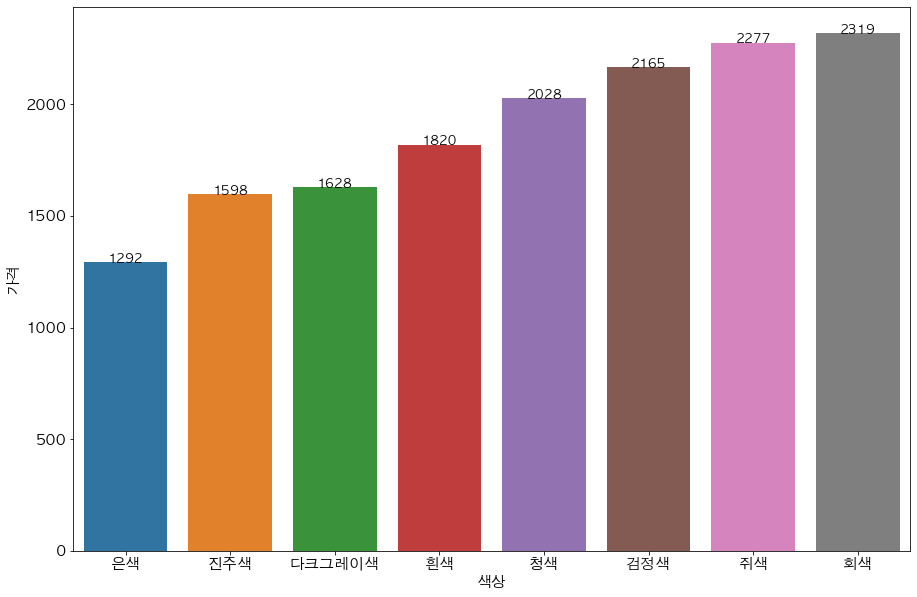

In [19]:
color_price=color.mean()
plt.figure(figsize=(15,10))
color_price=color_price.loc[['흰색','검정색','쥐색','은색','회색','진주색','청색','다크그레이색']]
color_price=color_price.sort_values(by='가격')
ax=sns.barplot(x=color_price.index,y='가격',data=color_price)
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30),
    ha='center', va='center', fontsize=13, color='black', xytext=(0, 10),
    textcoords='offset points')

# 연료

In [21]:
fuel=df.groupby('연료')

In [26]:
fuel.count()[['이름']]

,이름
연료,
0,6
LPG,925
경유,7949
경유+전기,7
수소전기,17
전기,132
하이브리드,884
휘발유,11371
휘발유+LPG,12


In [33]:
fuel.mean()[['가격','연식','주행거리']].iloc[1:]

,가격,연식,주행거리
연료,,,
LPG,1258.027027,2014.591351,83526.081081
경유,1995.712794,2016.828532,78362.305321
경유+전기,6781.428571,2018.285714,78589.428571
수소전기,5133.529412,2020.705882,19323.058824
전기,3870.530303,2019.659091,38483.106061
하이브리드,2589.199095,2018.550905,49239.819005
휘발유,1886.943892,2016.764928,60947.517017
휘발유+LPG,822.500000,2016.333333,43361.250000


# 연료+차종

In [40]:
fuel_kind=df.groupby(['연료','차종'])

In [41]:
fuel_kind.count()[3:]

이름  제조회사   모델명    가격   배기량    연식    색상  주행거리   변속기  압류/저당  \
연료      차종                                                                  
LPG     0        3     3     3     3     3     3     3     3     3      3   
        RV     102   102   102   102   102   102   102   102   102    102   
        SUV     27    27    27    27    27    27    27    27    27     27   
        경승합차    27    27    27    27    27    27    27    27    27     27   
        경차      54    54    54    54    54    54    54    54    54     54   
        대형차    248   248   248   248   248   248   248   248   248    248   
        승합차     24    24    24    24    24    24    24    24    24     24   
        준중형차    29    29    29    29    29    29    29    29    29     29   
        중형차    379   379   379   379   379   379   379   379   379    379   
        특장차      6     6     6     6     6     6     6     6     6      6   
        화물차     26    26    26    26    26    26    26    26    26     26   
경유      0      167   167   167   167   167   167   167   167   167    167   
        RV     825   825   825   825   825   825   825   825   825    825   
        SUV   4283  4283  4283  4283  4283  4283  4283  4283  4283   4283   
        기타       1     1     1     1     1     1     1     1     1      1   
        대형차    358   358   358   358   358   358   358   358   358    358   
        소형차    122   122   122   122   122   122   122   122   122    122   
        스포츠카    46    46    46    46    46    46    46    46    46     46   
        승합차    279   279   279   279   279   279   279   279   279    279   
        준중형차   608   608   608   608   608   608   608   608   608    608   
        중형차    684   684   684   684   684   684   684   684   684    684   
        특장차     32    32    32    32    32    32    32    32    32     32   
        화물차    544   544   544   544   544   544   544   544   544    544   
경유+전기   SUV      3     3     3     3     3     3     3     3     3      3   
        대형차      2     2     2     2     2     2     2     2     2      2   
        중형차      2     2     2     2     2     2     2     2     2      2   
수소전기    SUV     12    12    12    12    12    12    12    12    12     12   
        준중형차     5     5     5     5     5     5     5     5     5      5   
전기      0        6     6     6     6     6     6     6     6     6      6   
        SUV     40    40    40    40    40    40    40    40    40     40   
        경차       1     1     1     1     1     1     1     1     1      1   
        대형차      5     5     5     5     5     5     5     5     5      5   
        소형차     12    12    12    12    12    12    12    12    12     12   
        스포츠카     2     2     2     2     2     2     2     2     2      2   
        준중형차    48    48    48    48    48    48    48    48    48     48   
        화물차     18    18    18    18    18    18    18    18    18     18   
하이브리드   0       13    13    13    13    13    13    13    13    13     13   
        SUV    212   212   212   212   212   212   212   212   212    212   
        경차       2     2     2     2     2     2     2     2     2      2   
        대형차    400   400   400   400   400   400   400   400   400    400   
        소형차      5     5     5     5     5     5     5     5     5      5   
        스포츠카     4     4     4     4     4     4     4     4     4      4   
        준중형차    37    37    37    37    37    37    37    37    37     37   
        중형차    209   209   209   209   209   209   209   209   209    209   
        화물차      2     2     2     2     2     2     2     2     2      2   
휘발유     0      148   148   148   148   148   148   148   148   148    148   
        RV      89    89    89    89    89    89    89    89    89     89   
        SUV   1774  1774  1774  1774  1774  1774  1774  1774  1774   1774   
        경차    1401  1401  1401  1401  1401  1401  1401  1401  1401   1401   
        기타       1     1     1     1     1     1     1     1     1      1   
        대형차 

# 구동방식

In [44]:
df['구동방식'].value_counts()

전륜    13152
후륜     6153
4륜     1998
Name: 구동방식, dtype: int64

# 생산지

In [45]:
df['생산지'].value_counts()

국산차    17818
외제차     3485
Name: 생산지, dtype: int64

# 연식

In [46]:
df['연식'].value_counts()

2019    3522
2018    3336
2020    2579
2016    2166
2017    2069
2015    1630
2021    1350
2014    1338
2012     925
2013     868
2011     512
2010     331
2022     238
2009     196
2008      91
2007      50
2006      27
1999      25
2005      21
2004      11
2003       8
2002       4
0          2
1996       2
2023       1
1991       1
Name: 연식, dtype: int64

# 상관 관계

<AxesSubplot:>

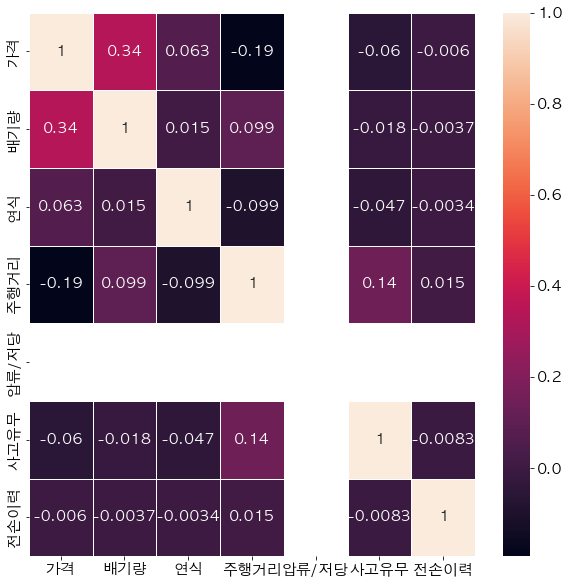

In [20]:
# 상관관계 히트맵
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidths=.5)